<a href="https://colab.research.google.com/github/unclepete-20/PneumoCareML/blob/main/PneumoCareML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**PneumoCareML**

Welcome to this Jupyter Notebook implementation guide, where we will explore the classification of pneumonia X-rays using Convolutional Neural Networks (CNNs). Pneumonia is a common and potentially life-threatening respiratory infection that affects millions of people worldwide, and the early and accurate diagnosis of pneumonia plays a vital role in improving patient outcomes.

Understanding Pneumonia:
Pneumonia is an inflammatory condition affecting the lungs, primarily caused by infection. It can be caused by various pathogens such as bacteria, viruses, fungi, or parasites, leading to the inflammation and consolidation of lung tissue. Pneumonia can range from mild to severe, with symptoms including cough, fever, difficulty breathing, and chest pain. Severe cases of pneumonia can be particularly dangerous, especially among vulnerable populations.

Most Affected Population:
Pneumonia can affect individuals of all ages, but certain populations are more susceptible to severe infections. Infants and young children, elderly individuals, and people with compromised immune systems are particularly vulnerable. In developing countries, where access to healthcare and vaccination rates may be lower, pneumonia remains a significant cause of illness and mortality among children.

Global Statistics:
Pneumonia is a leading cause of morbidity and mortality worldwide. Let's explore some statistics that highlight the impact of pneumonia on a global scale:

According to the World Health Organization (WHO), pneumonia is responsible for approximately 15% of all deaths in children under the age of 5.
Pneumonia claims the lives of more than 800,000 children under the age of 5 every year, accounting for around 2,200 deaths per day.
In 2019, an estimated 2.5 million deaths occurred due to pneumonia among all age groups.
Low- and middle-income countries bear a significant burden, accounting for approximately 99% of all pneumonia-related child deaths.
Importance of X-ray Classification:
Medical imaging, such as X-rays, plays a crucial role in diagnosing pneumonia. Radiologists often rely on X-ray images to identify patterns and abnormalities indicative of pneumonia in the lungs. However, manual interpretation of X-rays can be time-consuming and prone to human error. The integration of CNNs can assist in automating the classification process, providing efficient and accurate diagnoses.

In this Jupyter Notebook, we will leverage the power of deep learning and CNNs to develop a pneumonia X-ray classification model. By training the model on a diverse dataset of X-ray images, we aim to create a system that can assist healthcare professionals in diagnosing pneumonia more effectively. Through this implementation, we hope to contribute to the ongoing efforts to improve pneumonia diagnosis and reduce the burden of this respiratory infection worldwide.

Let's proceed with the notebook to explore the dataset, build the CNN model, train it on X-ray images, and evaluate its performance in classifying pneumonia accurately.

In [ ]:
# Imports neccesary to work on the project
import re
import os
import random
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import glob
from PIL import Image
from sklearn.model_selection import train_test_split
import random

### 1.1 - Exploratory data analysis

In [ ]:
# We begin the process of unifying the images in their corresponding category.
normal_train_images = glob.glob('/content/drive/MyDrive/chest_xray/train/NORMAL/*.jpeg')
pneumonia_train_images = glob.glob('/content/drive/MyDrive/chest_xray/train/PNEUMONIA/*.jpeg')

normal_test_images = glob.glob('/content/drive/MyDrive/chest_xray/test/NORMAL/*.jpeg')
pneumonia_test_images = glob.glob('/content/drive/MyDrive/chest_xray/test/PNEUMONIA/*.jpeg')

In [ ]:
print(f"Number of NORMAL images: {len(normal_train_images)}")
print(f"Number of PNEUMONIA images: {len(pneumonia_train_images)}")

Number of NORMAL images: 1349
Number of PNEUMONIA images: 3883


In [ ]:
# Labels are assigned to the images, e.g. 0 for NORMAL and 1 for PNEUMONIA.
normal_train_labels = [0] * len(normal_train_images)
pneumonia_train_labels = [1] * len(pneumonia_train_images)

normal_test_labels = [0] * len(normal_test_images)
pneumonia_test_labels = [1] * len(pneumonia_test_images)

In [ ]:
# The images and labels from the NORMAL and PNEUMONIA folders are now combined into a single dataset.
train_images = normal_train_images + pneumonia_train_images
train_labels = normal_train_labels + pneumonia_train_labels

test_images = normal_test_images + pneumonia_test_images
test_labels = normal_test_labels + pneumonia_test_labels

In [ ]:
# The data set is shuffled to ensure a good distribution of the images.
train_indices = np.arange(len(train_images))
np.random.shuffle(train_indices)
train_images = [train_images[i] for i in train_indices]
train_labels = [train_labels[i] for i in train_indices]

test_indices = np.arange(len(test_images))
np.random.shuffle(test_indices)
test_images = [test_images[i] for i in test_indices]
test_labels = [test_labels[i] for i in test_indices]

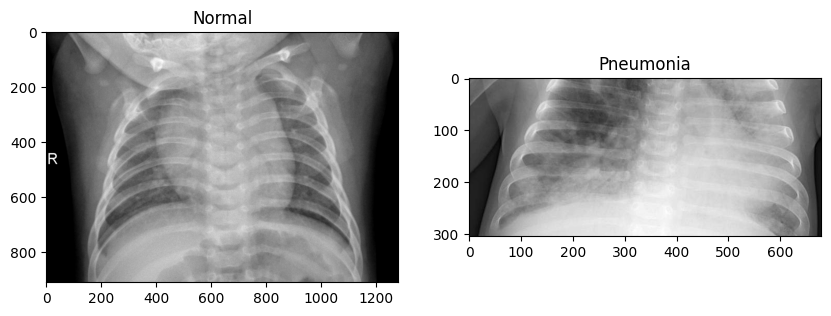

In [ ]:
# Both cases are shown in order to observe the differences clearly
train_n = '/content/drive/MyDrive/chest_xray/train/NORMAL/'
train_p = '/content/drive/MyDrive/chest_xray/train/PNEUMONIA/'

# Normal pic
rand_norm = np.random.randint(0, len(os.listdir(train_n)))
norm_pic = os.listdir(train_n)[rand_norm]
norm_pic_address = train_n + norm_pic

# Pneumonia pic
rand_p = np.random.randint(0, len(os.listdir(train_p)))
sic_pic = os.listdir(train_p)[rand_p]
sic_address = train_p + sic_pic

# Load the images and convert to grayscale
norm_load = Image.open(norm_pic_address).convert('L')
sic_load = Image.open(sic_address).convert('L')

# Plot the images
f = plt.figure(figsize=(10, 6))
a1 = f.add_subplot(1, 2, 1)
img_plot = plt.imshow(norm_load, cmap='gray')
a1.set_title('Normal')

a2 = f.add_subplot(1, 2, 2)
img_plot = plt.imshow(sic_load, cmap='gray')
a2.set_title('Pneumonia')

plt.show()

### 1.2 - Data pre-processing

In [ ]:
# Data is loaded and formatted to make sure it fits the CNN
def random_rotation_angle():
    return random.randint(0, 360)

def load_images(path, label):
    images = []
    labels = []
    for img_path in glob.glob(path + '/*.jpeg'):
        img = Image.open(img_path).convert('L').resize((64, 64))
        rotation_angle = random_rotation_angle()
        rotated_img = img.rotate(rotation_angle)
        img_array = np.array(rotated_img) / 255.0
        images.append(img_array)
        labels.append(label)
    return images, labels

train_n = '/content/drive/MyDrive/chest_xray/train/NORMAL/'
train_p = '/content/drive/MyDrive/chest_xray/train/PNEUMONIA/'

normal_images, normal_labels = load_images(train_n, 0)
pneumonia_images, pneumonia_labels = load_images(train_p, 1)

images = normal_images + pneumonia_images
labels = normal_labels + pneumonia_labels

images = np.array(images)
labels = np.array(labels)
images = images.reshape(-1, 64, 64, 1)

X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

### 1.3 - CNN model implementation using TensorFlow

In [ ]:
# CNN is developed for this problem in particular
model = tf.keras.models.Sequential()

# First layer
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 1), padding='same'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.25)) # Add dropout layer

# Second layer
model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.25)) # Add dropout layer

# Third layer
model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.25)) # Add dropout layer

# Fourth layer
model.add(layers.Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.25)) # Add dropout layer

# Flatten and add fully connected layers
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5)) # Add dropout layer
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.5)) # Add dropout layer
model.add(layers.Dense(2, activation='softmax'))

model.summary()


In [ ]:
# This callback function serves to end training if desired accuracy is reached
'''
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy') >= 0.97):
      print("\nReached 97% accuracy so cancelling training!")
      self.model.stop_training = True
'''

### 1.4 - Model training

In [ ]:
# We import the callback class to instantiate the callback function
#callbacks = myCallback()

# The model is compiled in order to start training
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy']
              )
# The data is fitted to the model and training starts
history = model.fit(X_train, y_train, epochs=300, validation_data=(X_test, y_test))

### 1.5 - Model results

In [ ]:
# Function to plot the model's loss and accuracy history to follow patterns that may be useful for insights
def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    
    epochs = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 4))
    
    plt.subplot(1, 2, 1)
    plt.plot(epochs, acc, 'bo', label='Training accuracy')
    plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
    plt.title('Training and validation accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, 'bo', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()

plot_history(history)

In [ ]:
# Evaluate the model
test_loss, test_acc, test_precision, test_recall, test_auc = model.evaluate(X_test, y_test, verbose=2)
print(f'Test accuracy: {test_acc}')
print(f'Test precision: {test_precision}')
print(f'Test recall: {test_recall}')
print(f'Test AUC: {test_auc}')

In [ ]:
# Finally, we can make predictions with our model
predictions = model.predict(X_test)
predicted_labels = np.argmax(predictions, axis=1)

In [ ]:
# This function plots the results graphically
def display_predictions(images, true_labels, predicted_labels, num_images=10):
    plt.figure(figsize=(num_images * 2, 3))

    for i in range(num_images):
        plt.subplot(1, num_images, i + 1)
        plt.imshow(images[i], cmap='gray')
        plt.xticks([])
        plt.yticks([])
        plt.xlabel(f'True: {true_labels[i]}\nPred: {predicted_labels[i]}')

    plt.show()

# We present the results by plotting them
display_predictions(X_test, y_test, predicted_labels)